In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

,Age,Sex,Chest Pain type,Resting Blood pressure,Serum Cholestoral in mg/dl,Fasting Blood sugar > 120 mg/dl,Resting Electrocardiographic results,Max heart rate achieved,Exercise induced angina,Oldpeak,Slope of the peak exercise ST segment,No of major vessels,Thal,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


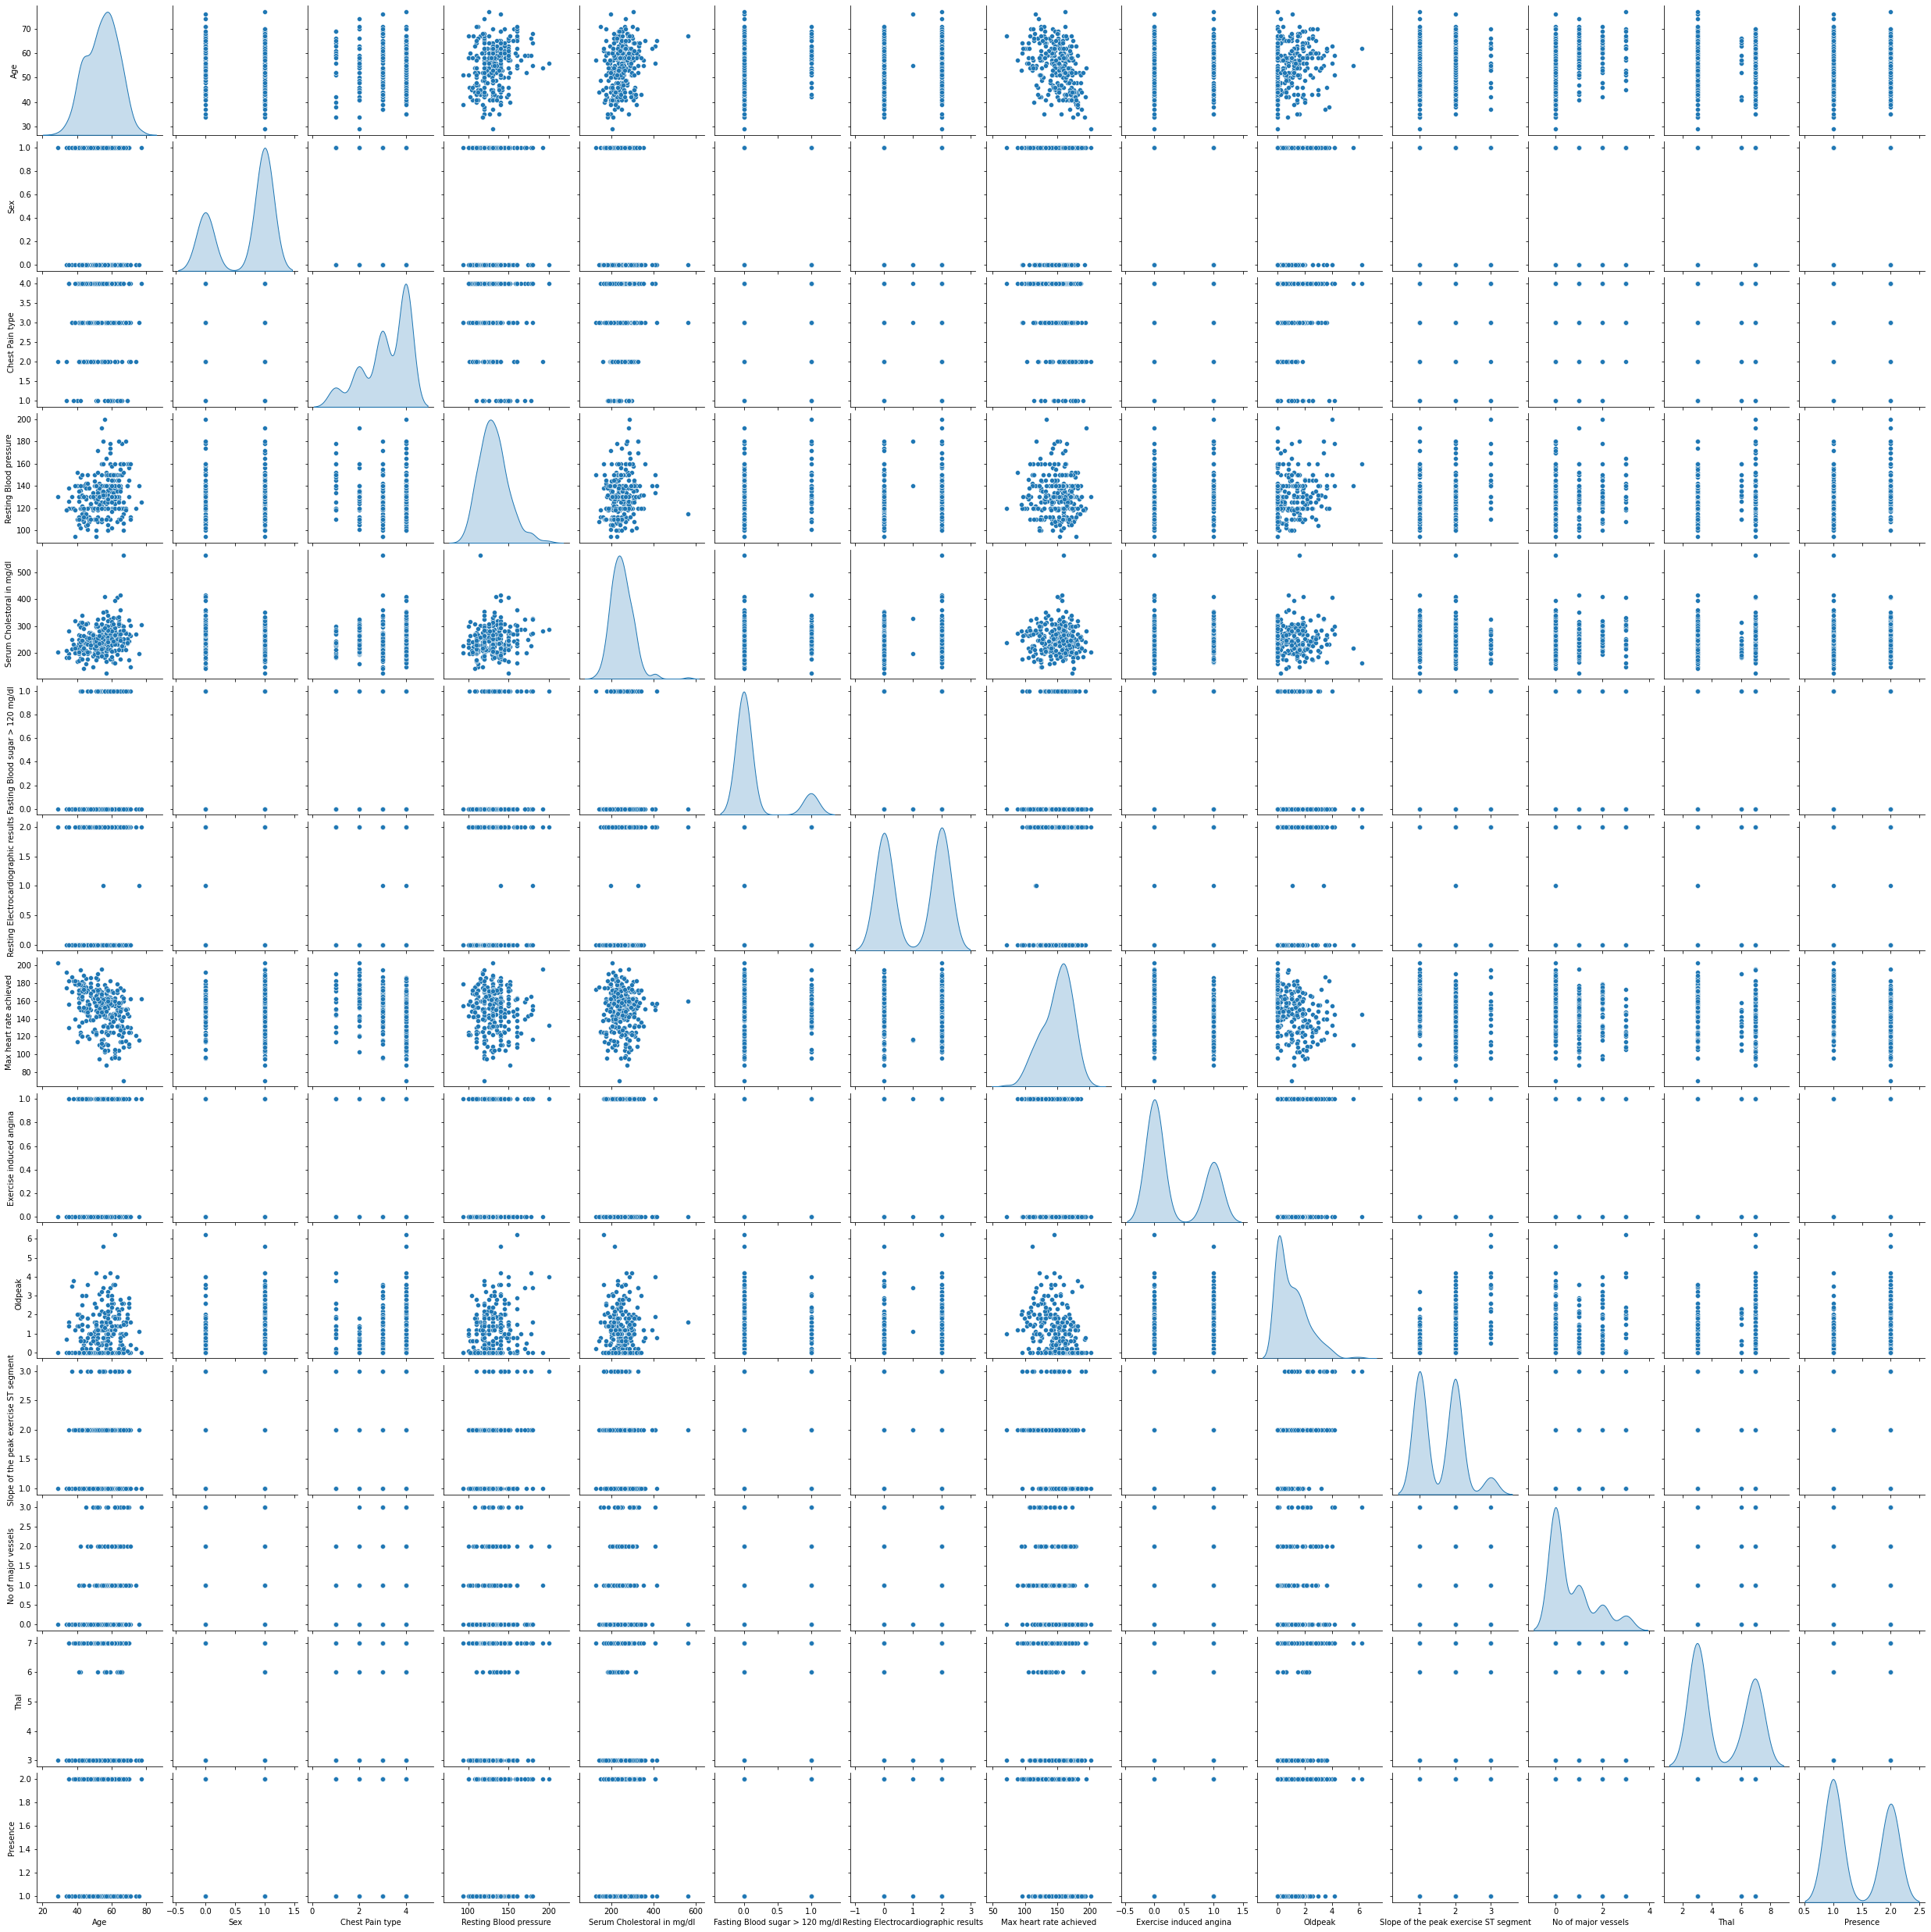

In [6]:
sns.pairplot(df, diag_kind= 'kde')

In [7]:
X= df.drop('Presence', axis=1)
y= df['Presence']

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=19)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 13), (68, 13), (202,), (68,))

# Lets start PCA from here step by step

step1: centre the data in independent features

In [11]:
sc= StandardScaler()

In [12]:
X_train_std= sc.fit_transform(X_train)

In [13]:
train_cov_matrix= np.cov(X_train_std.T)

In [14]:
train_cov_matrix

array([[ 1.00497512, -0.13378789,  0.13017571,  0.32399675,  0.20004443,
         0.11257581,  0.08235874, -0.42970902,  0.09691922,  0.22733188,
         0.19788524,  0.39193808,  0.15232007],
       [-0.13378789,  1.00497512,  0.0375952 , -0.08313025, -0.25178292,
         0.01968242,  0.03176807, -0.03974432,  0.12575169,  0.09213392,
         0.01946363, -0.00246768,  0.39375824],
       [ 0.13017571,  0.0375952 ,  1.00497512,  0.00812261,  0.07914987,
        -0.04106561,  0.08031472, -0.35058488,  0.33870635,  0.17986761,
         0.17844558,  0.20301411,  0.28612241],
       [ 0.32399675, -0.08313025,  0.00812261,  1.00497512,  0.25776513,
         0.10870242,  0.09947206, -0.05425675,  0.1245685 ,  0.26723362,
         0.15311764,  0.15617783,  0.15606781],
       [ 0.20004443, -0.25178292,  0.07914987,  0.25776513,  1.00497512,
         0.01865856,  0.18395283,  0.01955839,  0.04787154,  0.03337483,
        -0.02622543,  0.15061936, -0.02960116],
       [ 0.11257581,  0.019682

step2: Matrix Decomposition

In [15]:
eigenvalues, eigenvectors= np.linalg.eig(train_cov_matrix)

In [16]:
eigenvalues

array([3.10473019, 1.71006374, 1.17841124, 1.12308807, 1.10350066,
       0.9311723 , 0.8666889 , 0.29811872, 0.3957993 , 0.72810303,
       0.45615164, 0.56007379, 0.60877504])

In [17]:
eigenvectors

array([[ 3.13044398e-01,  3.59078962e-01,  8.11072052e-02,
         9.81828867e-02,  2.90524234e-01, -2.89301820e-02,
         2.82998321e-01, -3.22825741e-02,  6.21162856e-01,
        -4.28729990e-01,  5.62144397e-02,  1.22705490e-01,
         5.10523980e-02],
       [ 7.78985747e-02, -4.89627491e-01,  4.79000495e-01,
        -9.93669628e-02, -2.17688392e-01,  2.63575337e-02,
         1.78940867e-01, -1.76401434e-01,  7.01749729e-02,
        -1.68399957e-01, -5.10570364e-01,  2.69927512e-01,
         1.91924927e-01],
       [ 2.83124191e-01, -1.18032196e-01, -1.23738590e-01,
         5.59770752e-01, -1.49234453e-01, -4.41261040e-02,
        -1.73122948e-01, -4.25749703e-02,  1.59692077e-01,
         2.24359619e-01, -1.72974649e-01,  2.83587802e-01,
        -5.78853412e-01],
       [ 2.17954484e-01,  3.50395268e-01,  1.12550889e-01,
        -3.29918348e-01, -1.67378585e-01,  5.14134418e-01,
         2.93949653e-02, -1.21778838e-01, -3.02617768e-01,
        -2.51561019e-01, -1.48318110e

step 3: Sort the eigenvalues in descending order

In [19]:
# make a set of (eigenvalues, eigenvectors) pairs
train_eig_pairs= [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]

In [20]:
train_eig_pairs.sort(reverse=True)

In [21]:
train_eig_pairs

[(3.104730188088598,
  array([ 0.3130444 ,  0.35907896,  0.08110721,  0.09818289,  0.29052423,
         -0.02893018,  0.28299832, -0.03228257,  0.62116286, -0.42872999,
          0.05621444,  0.12270549,  0.0510524 ])),
 (1.7100637412614297,
  array([ 0.07789857, -0.48962749,  0.4790005 , -0.09936696, -0.21768839,
          0.02635753,  0.17894087, -0.17640143,  0.07017497, -0.16839996,
         -0.51057036,  0.26992751,  0.19192493])),
 (1.1784112438397334,
  array([ 0.28312419, -0.1180322 , -0.12373859,  0.55977075, -0.14923445,
         -0.0441261 , -0.17312295, -0.04257497,  0.15969208,  0.22435962,
         -0.17297465,  0.2835878 , -0.57885341])),
 (1.1230880671671342,
  array([ 0.21795448,  0.35039527,  0.11255089, -0.32991835, -0.16737859,
          0.51413442,  0.02939497, -0.12177884, -0.30261777, -0.25156102,
         -0.14831811, -0.05811875, -0.46896133])),
 (1.1035006620192995,
  array([ 0.08869136,  0.49026459, -0.08574623,  0.16127517, -0.39774725,
          0.21241721,

step4: Seperate the sorted eigenvalues and eigenvectors for further graphing 

In [24]:
sorted_train_eigvalues = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]

In [26]:
sorted_train_eigvectors= [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

In [27]:
sorted_train_eigvalues # sortede values

[3.104730188088598,
 1.7100637412614297,
 1.1784112438397334,
 1.1230880671671342,
 1.1035006620192995,
 0.9311722979959715,
 0.8666889042315808,
 0.7281030261177985,
 0.6087750361921795,
 0.5600737909397042,
 0.456151642668046,
 0.3957992972937311,
 0.2981187191002024]

step5: Convert eigenvalues in to %age of total covariance explained and create a cumulative sum

In [31]:
tot= sum(eigenvalues)
var_explained = [(i/tot) for i in sorted_train_eigvalues]
cum_var_explained = np.cumsum(var_explained)

In [33]:
var_explained

[0.2376430951278785,
 0.1308921599366138,
 0.09019827113929425,
 0.08596370963465128,
 0.08446444518883453,
 0.07127404108803903,
 0.06633833577705558,
 0.05573065813011336,
 0.04659702295301913,
 0.04286931910848465,
 0.03491488201686114,
 0.03029537652552934,
 0.022818683373625574]

In [32]:
cum_var_explained

array([0.2376431 , 0.36853526, 0.45873353, 0.54469724, 0.62916168,
       0.70043572, 0.76677406, 0.82250472, 0.86910174, 0.91197106,
       0.94688594, 0.97718132, 1.        ])

step6: plot the % of covariance captured by each eigen vector and cumulative covariance 

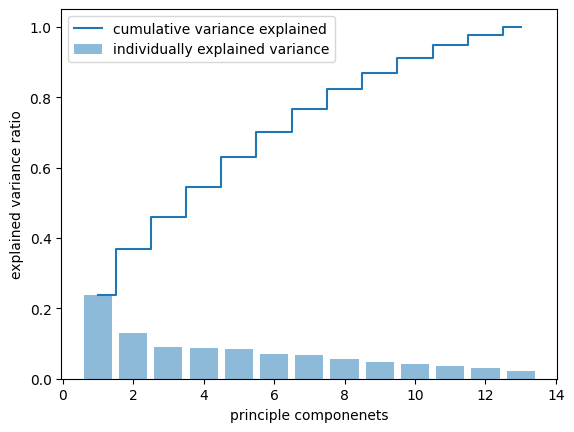

In [42]:
plt.bar(range(1,14), var_explained, alpha=0.5, align= 'center', label= 'individually explained variance')
plt.step(range(1,14), cum_var_explained, where= 'mid', label= 'cumulative variance explained')
plt.ylabel('explained variance ratio')
plt.xlabel('principle componenets')
plt.legend(loc= 'best')
plt.show()

step7: drop the principle components those captured an insgnificant amount of covariance compared to others and 
    project the original data in to reduced principle component dimention space.

In [53]:
p_reduce = np.array(sorted_train_eigvectors[0:5])

In [54]:
X_std_5D= np.dot(X_train_std, p_reduce.T)

In [55]:
proj_train_data_df= pd.DataFrame(X_std_5D)

In [56]:
proj_train_data_df.head()

,0,1,2,3,4
0,0.089687,0.565069,0.648742,-0.113804,1.251772
1,1.783744,0.795577,-0.500897,-2.504760,-0.914816
2,-0.554871,-3.234594,0.734028,-2.285788,1.750754
3,1.542925,-0.244281,-1.766334,-0.341418,0.234930
4,1.246687,0.350130,-0.734927,-0.888127,0.861446


step8: now build the Logistic Regression or any classification Algo

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_reg= LogisticRegression()

In [61]:
log_reg.fit(proj_train_data_df, y_train)

LogisticRegression()

In [63]:
log_reg.score(proj_train_data_df, y_train)

0.8118811881188119

In [71]:
#transofrm X_test also in pc dimension space
X_test_std = sc.fit_transform(X_test)
X_test_std_5D= np.dot(X_test_std, p_reduce.T)

In [73]:
proj_test_Data_df= pd.DataFrame(X_test_std_5D)

In [74]:
proj_test_Data_df.head()

,0,1,2,3,4
0,-0.919788,-0.527674,-0.797404,0.931607,-1.028521
1,-0.436873,-0.711631,-0.516444,-0.730243,0.988583
2,1.957370,1.597002,0.247119,0.314081,2.076602
3,1.209637,0.169026,-0.530666,0.357433,-0.648944
4,0.770001,-0.581506,-1.840958,-1.605979,-2.383972


In [76]:
y_pred= log_reg.predict(proj_test_Data_df)

In [80]:
log_reg.score(proj_test_Data_df, y_test)

0.8529411764705882